In [53]:
import random
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split



In [55]:
random.seed(42)
customerID=[]
gender=[]
age=[]
ServiceLength=[]
contractType=[]
monthlyCharges=[]
totalCharges=[]
churn=[]

In [56]:
# Generating data with outliers
for CustomerIDs in range(1001, 2001):
    customerID.append(CustomerIDs)
    age.append(random.randint(18, 65))
    gender.append(random.choice(['Male', 'Female']))
    ServiceLength.append(random.randint(1, 60))
    contractType.append(random.choice(['Two-Year', 'One-Year','Month-to-Month']))
    monthlyCharges.append(random.randint(30, 150))
    totalCharges.append(random.randint(100, 5000))
    churn.append(random.choice(['Yes', 'No']))

In [57]:
# Introduce outliers in the TotalCharges column
outliers_indices = random.sample(range(len(totalCharges)), 10)
for index in outliers_indices:
    totalCharges[index] = random.randint(5000, 10000)

# Create a DataFrame
data = pd.DataFrame({
    'CustomerID': customerID,
    'Age': age,
    'Gender': gender,
    'ServiceLength': ServiceLength,
    'ContractType': contractType,
    'MonthlyCharges': monthlyCharges,
    'TotalCharges': totalCharges,
    'Churn': churn
})


In [58]:
df = pd.DataFrame(data)
df.to_csv('Churn_Prediction.csv', index=False)

# outliers

In [59]:
# Load your dataset
data = pd.read_csv('Churn_Prediction.csv')

# Calculate quartiles and IQR for the column of interest (e.g., 'TotalCharges')
Q1 = data['TotalCharges'].quantile(0.25)
Q3 = data['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['TotalCharges'] < lower_bound) | (data['TotalCharges'] > upper_bound)]

# Print the outliers
outliers


,CustomerID,Age,Gender,ServiceLength,ContractType,MonthlyCharges,TotalCharges,Churn
190,1191,21,Female,18,Two-Year,45,9474,Yes
231,1232,22,Male,34,Month-to-Month,54,8365,No
393,1394,31,Female,21,One-Year,35,9110,Yes
434,1435,61,Male,47,One-Year,150,9721,No
565,1566,18,Female,14,Two-Year,118,9734,No
619,1620,36,Male,31,Two-Year,124,8006,Yes
839,1840,60,Male,8,Two-Year,111,9080,No


# Removing outliers

In [60]:
for index, row in outliers.iterrows():
    data.at[index, 'TotalCharges'] = random.randint(100, 5000)


In [61]:
num_cols = ['Age', 'ServiceLength','MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [62]:
 df.describe()

,CustomerID,Age,ServiceLength,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,1500.500000,41.898000,29.522000,90.822000,2646.9640
std,288.819436,13.755465,16.810178,34.367564,1500.5075
min,1001.000000,18.000000,1.000000,30.000000,105.0000
25%,1250.750000,30.000000,15.000000,62.000000,1370.5000
50%,1500.500000,42.000000,29.000000,91.000000,2632.0000
75%,1750.250000,54.000000,44.000000,120.000000,3842.2500
max,2000.000000,65.000000,60.000000,150.000000,9734.0000


In [65]:
 df.isna().sum()


CustomerID        0
Age               0
Gender            0
ServiceLength     0
ContractType      0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

In [66]:
l = LabelEncoder()
data['Gender'] = l.fit_transform(data['Gender'])
data['ContractType'] = l.fit_transform(data['ContractType'])
data['Churn'] = l.fit_transform(data['Churn'])

In [67]:
# data.to_csv('modified_dataset.csv', index=False)
df.describe()

,CustomerID,Age,ServiceLength,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,1500.500000,41.898000,29.522000,90.822000,2646.9640
std,288.819436,13.755465,16.810178,34.367564,1500.5075
min,1001.000000,18.000000,1.000000,30.000000,105.0000
25%,1250.750000,30.000000,15.000000,62.000000,1370.5000
50%,1500.500000,42.000000,29.000000,91.000000,2632.0000
75%,1750.250000,54.000000,44.000000,120.000000,3842.2500
max,2000.000000,65.000000,60.000000,150.000000,9734.0000


# Visualization

<AxesSubplot:ylabel='count'>

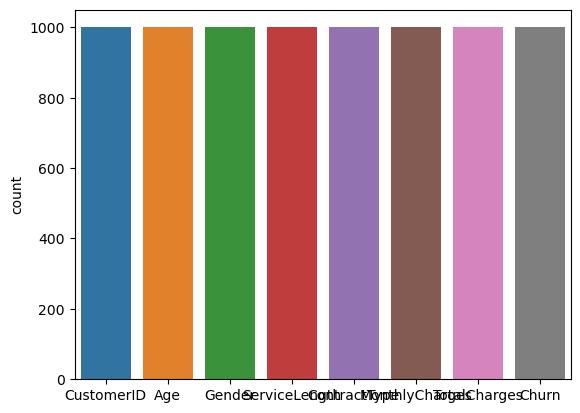

In [68]:
sns.countplot(data=data)


<AxesSubplot:xlabel='ContractType', ylabel='Count'>

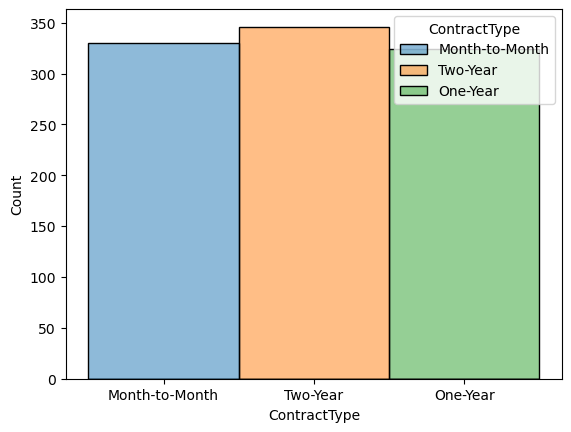

In [69]:
 sns.histplot(data=df, x='ContractType', hue='ContractType')


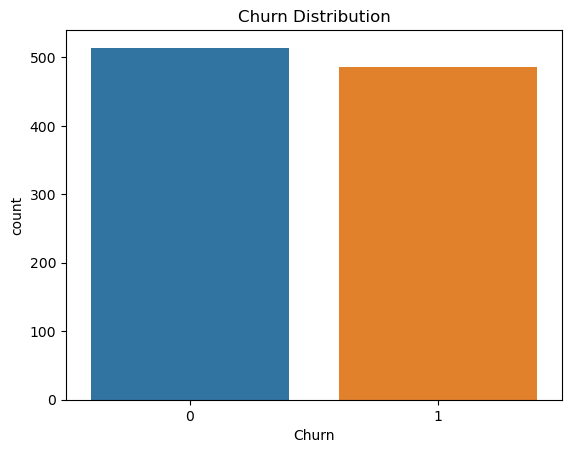

In [70]:
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()


<AxesSubplot:xlabel='Age', ylabel='TotalCharges'>

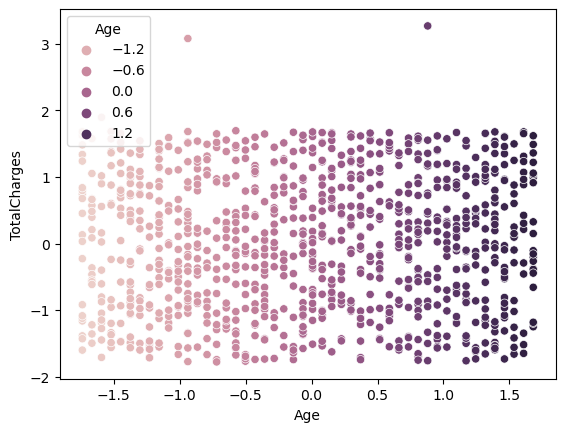

In [71]:
sns.scatterplot(data=data, x='Age', y='TotalCharges', hue='Age')

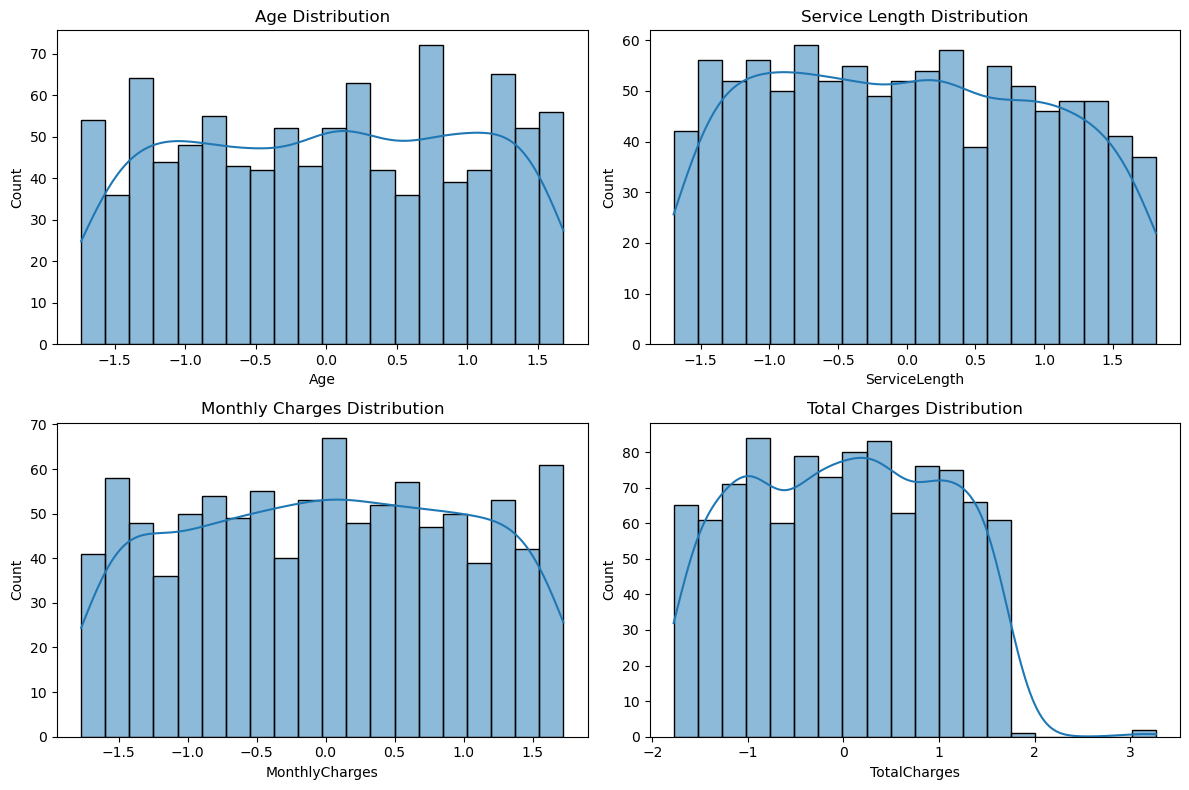

In [72]:

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Histograms for each variable
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['ServiceLength'], bins=20, kde=True)
plt.title('Service Length Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['MonthlyCharges'], bins=20, kde=True)
plt.title('Monthly Charges Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['TotalCharges'], bins=20, kde=True)
plt.title('Total Charges Distribution')

plt.tight_layout()
plt.show()


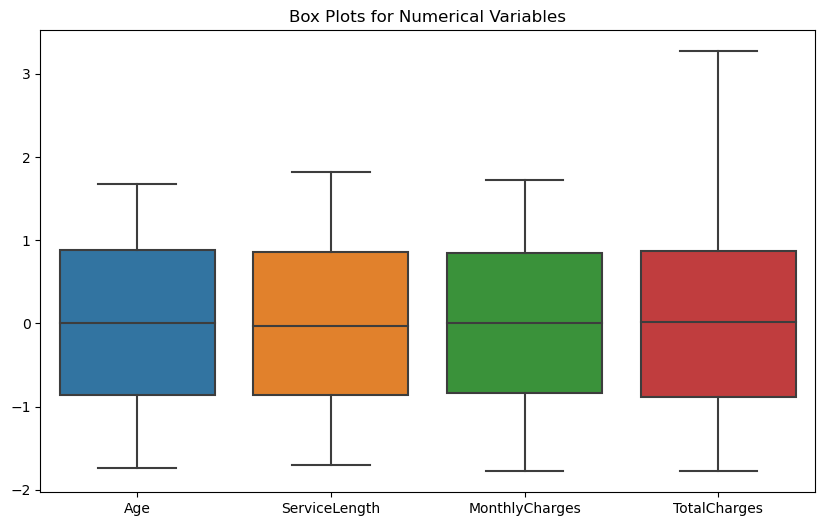

In [73]:
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'ServiceLength', 'MonthlyCharges', 'TotalCharges']])
plt.title('Box Plots for Numerical Variables')
plt.show()


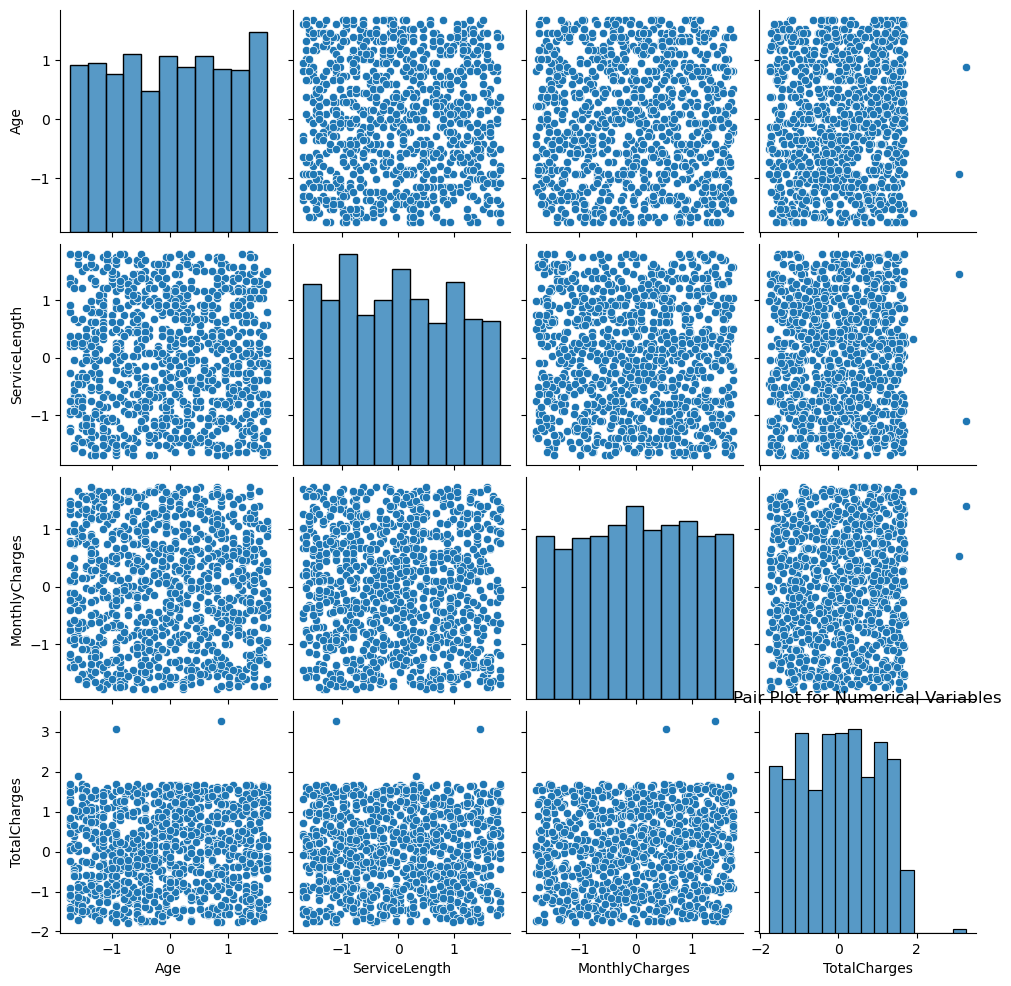

In [74]:

# Pair plot and correlation heatmap
sns.pairplot(data[['Age', 'ServiceLength', 'MonthlyCharges', 'TotalCharges']])
plt.title('Pair Plot for Numerical Variables')
plt.show()


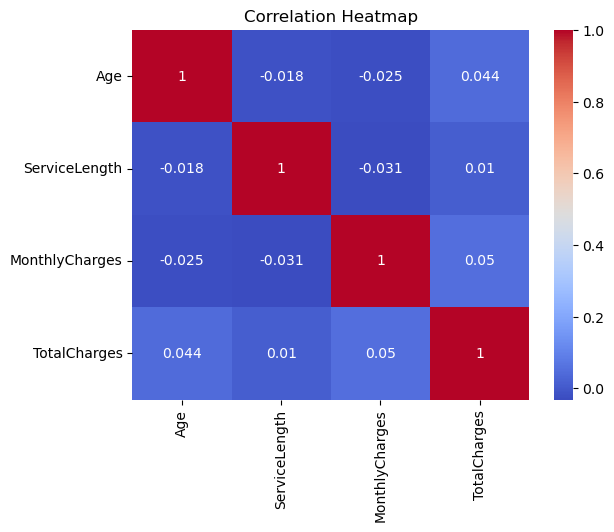

In [75]:
correlation_matrix = data[['Age', 'ServiceLength', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [76]:
features = ['Gender', 'Age', 'ServiceLength', 'MonthlyCharges', 'TotalCharges']
target = 'Churn'

X = data[features]
y = data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)
logreg_pred = logreg_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Model Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))


print("\nRandom Forest Results:")
a=accuracy_score(y_test, rf_pred
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Logistic Regression Results:
Accuracy: 0.545
              precision    recall  f1-score   support

           0       0.61      0.54      0.57       112
           1       0.49      0.56      0.52        88

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.55      0.55      0.55       200


Random Forest Results:
Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.57      0.51      0.54       112
           1       0.45      0.51      0.48        88

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.52      0.51      0.51       200



In [91]:

import joblib

# Load and preprocess your dataset
data = pd.read_csv('Churn_Prediction.csv')
# ... preprocess data ...
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
# Encode 'Churn' column (Yes: 1, No: 0)
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Encode 'ContractType' column
data['ContractType'] = label_encoder.fit_transform(data['ContractType'])

# Save the trained model to a file
joblib.dump(model, 'rf_model.pkl')


['rf_model.pkl']

In [89]:
a = joblib.load('rf_model.pkl')
a

RandomForestClassifier()